In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
def set_rc_params(fontsize=None):
    '''
    Set figure parameters
    '''

    if fontsize is None:
        fontsize = 16
    else:
        fontsize = int(fontsize)

    rc('font', **{'family': 'serif'})
    rc('text', usetex=False)

    plt.rcParams.update({'axes.linewidth': 1.3})
    plt.rcParams.update({'xtick.labelsize': fontsize})
    plt.rcParams.update({'ytick.labelsize': fontsize})
    plt.rcParams.update({'xtick.major.size': 8})
    plt.rcParams.update({'xtick.major.width': 1.3})
    plt.rcParams.update({'xtick.minor.visible': True})
    plt.rcParams.update({'xtick.minor.width': 1.})
    plt.rcParams.update({'xtick.minor.size': 6})
    plt.rcParams.update({'xtick.direction': 'out'})
    plt.rcParams.update({'ytick.major.width': 1.3})
    plt.rcParams.update({'ytick.major.size': 8})
    plt.rcParams.update({'ytick.minor.visible': True})
    plt.rcParams.update({'ytick.minor.width': 1.})
    plt.rcParams.update({'ytick.minor.size': 6})
    plt.rcParams.update({'ytick.direction': 'out'})
    plt.rcParams.update({'axes.labelsize': fontsize})
    plt.rcParams.update({'axes.titlesize': fontsize})
    plt.rcParams.update({'legend.fontsize': int(fontsize-2)})
    plt.rcParams['text.usetex'] = False
    plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb}'

In [4]:
set_rc_params()

In [5]:
# getting the raw data from the simulations we ran, and then putting it in a nicer format
with open("combined_longest_cycles.pkl", "rb") as f:
    combined_longest_cycles = pickle.load(f)
    
# number of prisoners : longest cycles for 10000 trials 
simulation_data = dict(zip(range(1, 1001), combined_longest_cycles))

In [6]:
def compute_success_rate(num_prisoners: int, longest_cycles: list[int]):
    wins = [1 if (length <= (num_prisoners / 2)) else 0 for length in longest_cycles]
    return sum(wins) / len(longest_cycles)

In [7]:
# one nice plot is the success rate as the number of prisoners go from 0 -> 1000
success_rates = {}
for num_prisoners, longest_cycles in simulation_data.items():
    # skip over odd numbers, because condition unclear
    if num_prisoners % 2 == 1:
        continue
    else:
        success_rates[num_prisoners] = compute_success_rate(num_prisoners, longest_cycles)

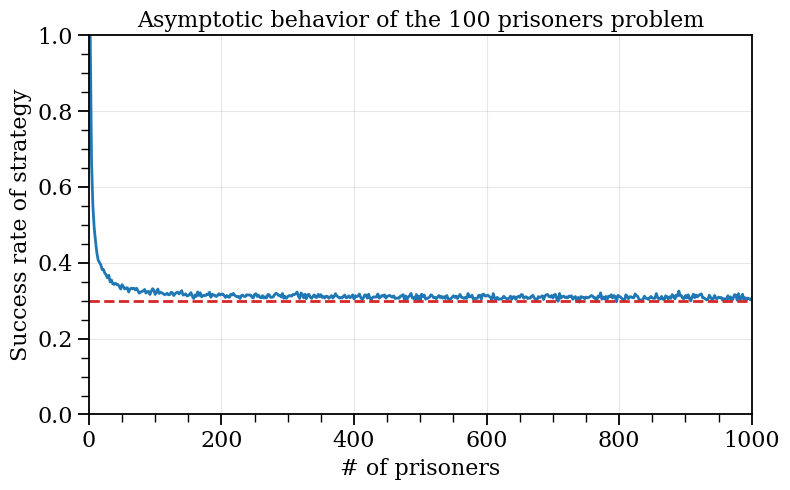

In [8]:
x = sorted(success_rates.keys())
y = [success_rates[k] for k in x]

plt.figure(figsize=(8,5))
plt.plot(x, y, linewidth=2)
plt.xlabel("# of prisoners")
plt.ylabel("Success rate of strategy")
plt.ylim(0, 1)
plt.xlim(0, 1000)
plt.title(r"Asymptotic behavior of the 100 prisoners problem")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.axhline(0.3, linestyle="--", linewidth=2, color="tab:red")
plt.savefig(
    "prisoners_asymptotic_behavior.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [10]:
bins = 20
n_max = 1000

global_max = 0.0

for n in range(1, n_max):
    data = combined_longest_cycles[n]
    hist, _ = np.histogram(data, bins=bins, range=(0, n))
    hist = hist / hist.max()   # shape-normalized
    global_max = max(global_max, hist.max())

fig, ax = plt.subplots(figsize=(7, 4))
fig.subplots_adjust(bottom=0.18)

def update(n):
    ax.clear()

    data = combined_longest_cycles[n]

    hist, edges = np.histogram(data, bins=bins, range=(0, n))
    hist = hist / hist.max()   # normalize by peak height

    centers = 0.5 * (edges[:-1] + edges[1:])
    width = edges[1] - edges[0]

    ax.bar(centers, hist, width=width, alpha=0.8)

    ax.set_xlim(0, n)
    ax.set_ylim(0, global_max)
    ax.axvline(n / 2, color="red", linestyle="--", linewidth=2)

    ax.set_title(rf"Distribution of longest cycle length n={n}")
    ax.set_xlabel("# of prisoners")

    ax.grid(alpha=0.3)

ani = animation.FuncAnimation(
    fig,
    update,
    frames=range(2, n_max, 2),
    interval=100,
)

ani.save("longest_cycle_distribution.gif", writer="pillow", dpi=300)
plt.close()
